# Math Behind Support Vector Machines

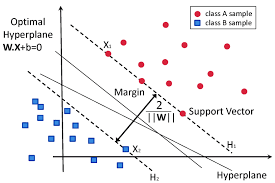

SVM is a classification method to separate data into two class based on the same feature. 

The idea is to separated the data with decision boundary (hyperplane to representing n dimensions), 

the goal is to have a good hyperplane to separate data, how?

A support vector is the least data points from different class,

we will make a line from each data points location as separated class.

Distance between both support vectors is called a margin, this is what we want to maximize.

Decision boundary or hyperplane is the center of margin.


## Vectors

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*GBBpqOsLDi2MC0e2MvBGhA.jpeg)

is an object which have magnitude (length) and start from (0,0).

vector u = (O-A)

||u|| = distance (u), or distance or magnitude or legnth of that vector from origin.

but not just that, vector also have direction

direction of u is defined with the angle of x axis (θ) and y axis (α)

okey, vectors can add or substract one another 

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*aViw6CZJhs4yrnrHbwmY-w.jpeg)


or multiplication called dot product ...

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*EtQDcspersPibAsT1_gk7w.jpeg)


dot product is calculated by : x⋅y = ∥x∥∥y∥cos(θ)

the result of dot product is called orthogonal projection:

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*61xCp9o_t13DouTStThRHQ.jpeg)



Okey but what dot product does, why we need the orthogonal projection, well the point is a projection will determine if a vector x is going to the same direction to vector u, or weight in the svm context, so it will determine if it is -1 or 1 to determine the class of data points.

## Hyperplanes


![](https://miro.medium.com/v2/resize:fit:1280/format:webp/1*H2QEWsP9-W4rBdIaxfVExg.jpeg)

is basically a decision boundary, y=ax+b. but for n dimension its written wt.x = 0, since we need the direction also.

the main formula of hyperplane is wx=0, but since we want it more flexible, we add b or bias to control the movement of the line from each origin simmetrically. wx=0 is wx+b=0 with b is 0.

so, we have each xi in the environment either its 0, <-1, >-1, or =1 , =-1.

okey, so support vetors is satisfy wx+b=1 and wx+b=-1.

now how to pick one the best margin one to separated the data.

pick one which has minimum Magnitude of w. why?

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*colCMuTP_LN4zvjfrsZcQA.jpeg)

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*WbD77tmV4dOwFA3q05sMHA.png)

## Conclution

OKEY Overalll the process is look like this

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*6mcff3dEDuTFT21IvlL1_Q.jpeg)

but this is one iteration, we didnt know the w and b value is have the max margin that effect hyperplane have a good decision boundaries line. 

soo?, yes we need Adjusting parameters, just use **Gradien Decent** or Stochastic Gradient Decent especially for svm.

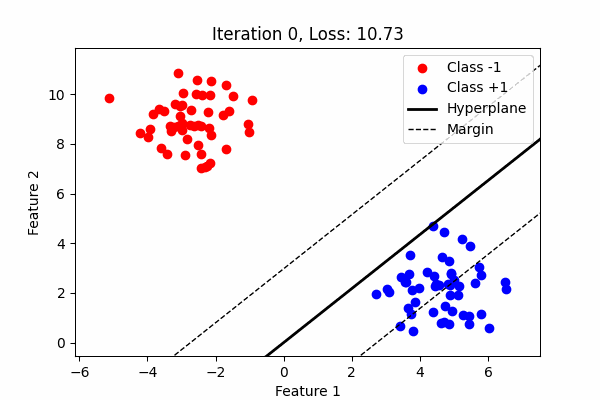

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tempfile
from IPython.display import display, Image
from sklearn.datasets import make_blobs  # Only used for reproducible data generation

# ===========================================================================
# Step 1: Generate & Save the Dataset (Fixed Random Data)
# ===========================================================================
np.random.seed(42)
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
# Convert labels from {0,1} to {-1, +1} for our SVM formulation.
y = np.where(y == 0, -1, 1)
dataset = {"X": X, "y": y}



# ===========================================================================
# Step 2: Implement SVM Training from Scratch (Subgradient Descent)
# ===========================================================================
def train_svm(X, y, lr=0.001, C=1.0, n_iters=1000, record_every=50):
    """
    Trains a linear SVM using subgradient descent on the hinge loss.
    
    Args:
      X: Feature matrix (n_samples, n_features).
      y: Labels in {-1, 1} (n_samples,).
      lr: Learning rate.
      C: Regularization parameter.
      n_iters: Total iterations.
      record_every: Record parameters every 'record_every' iterations.
    
    Returns:
      w: Learned weight vector.
      b: Learned bias.
      history: List of (iteration, w, b, loss) for visualization.
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    history = []
    
    for i in range(n_iters):
        # Start with gradient of regularizer
        grad_w = np.copy(w)  # derivative of (1/2)*||w||^2 is w
        grad_b = 0.0
        
        # Compute subgradient from hinge loss
        for j in range(n_samples):
            margin = y[j] * (np.dot(w, X[j]) + b)
            if margin < 1:
                grad_w -= C * y[j] * X[j]
                grad_b -= C * y[j]
        
        # Update parameters
        w = w - lr * grad_w
        b = b - lr * grad_b
        
        # Record state for visualization every 'record_every' iterations
        if i % record_every == 0:
            losses = np.maximum(0, 1 - y * (np.dot(X, w) + b))
            total_loss = 0.5 * np.dot(w, w) + C * np.sum(losses)
            history.append((i, w.copy(), b, total_loss))
    
    return w, b, history

w_opt, b_opt, history = train_svm(dataset["X"], dataset["y"], lr=0.001, C=1.0, n_iters=1000, record_every=50)

# ===========================================================================
# Step 3: Visualization Function for the Decision Boundary & Margins
# ===========================================================================
def plot_decision_boundary(ax, w, b, x_range):
    """
    Plot the hyperplane (decision boundary) where w^T*x + b = 0
    and the margins where w^T*x + b = ±1.
    """
    if np.abs(w[1]) > 1e-6:
        x_vals = np.array(x_range)
        y_vals = (-w[0] * x_vals - b) / w[1]
        ax.plot(x_vals, y_vals, 'k-', lw=2, label="Hyperplane")
        # Plot margin boundaries
        y_vals_margin1 = (-w[0] * x_vals - b + 1) / w[1]
        y_vals_margin2 = (-w[0] * x_vals - b - 1) / w[1]
        ax.plot(x_vals, y_vals_margin1, 'k--', lw=1, label="Margin")
        ax.plot(x_vals, y_vals_margin2, 'k--', lw=1)
    else:
        # If w[1] is nearly zero, draw vertical lines.
        x_const = -b / w[0]
        ax.axvline(x=x_const, color='k', lw=2)
        ax.axvline(x=(-b + 1) / w[0], color='k', linestyle='--', lw=1)
        ax.axvline(x=(-b - 1) / w[0], color='k', linestyle='--', lw=1)

# ===========================================================================
# Step 4: Animate the Training Process (Evolution of the Decision Boundary)
# ===========================================================================
fig, ax = plt.subplots(figsize=(6, 4))

def update(frame):
    ax.clear()
    iter_num, w, b, loss = history[frame]
    # Plot the data points
    ax.scatter(dataset["X"][dataset["y"] == -1][:, 0], dataset["X"][dataset["y"] == -1][:, 1], 
               color='red', label='Class -1')
    ax.scatter(dataset["X"][dataset["y"] == 1][:, 0], dataset["X"][dataset["y"] == 1][:, 1], 
               color='blue', label='Class +1')
    # Plot the decision boundary and margins
    plot_decision_boundary(ax, w, b, x_range=[dataset["X"][:, 0].min()-1, dataset["X"][:, 0].max()+1])
    ax.set_title(f"Iteration {iter_num}, Loss: {loss:.2f}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend(loc='upper right')
    ax.set_xlim(dataset["X"][:, 0].min()-1, dataset["X"][:, 0].max()+1)
    ax.set_ylim(dataset["X"][:, 1].min()-1, dataset["X"][:, 1].max()+1)

# Create the animation using the recorded history
ani = animation.FuncAnimation(fig, update, frames=len(history), interval=300)

# Save the animation as a GIF using a temporary file
gif_path = tempfile.NamedTemporaryFile(suffix=".gif").name
ani.save(gif_path, writer='pillow', fps=3)
plt.close()  # Close the figure to avoid duplicate output

# Display the animated GIF
display(Image(filename=gif_path))


but that will explain later, since we already have the good hyperplane, we continue to the main goal of every machine learning algorithm, yep, approximations.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*kuZo37HCxnZIQ9wfV74eVg.jpeg)

its basically dot product the new vector points, fx u1, and the result is determine is it 0, -1, 1, or outside that.